## Basic Perceptron

This week's assignment is to code a Perceptron in Python and train it to learn the basic AND, OR, and XOR logic operations.

I created a Perceptron function with parameters that will let me study the operation of this algorithm.

<!-- TEASER_END -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def perceptron(X, y, n=100, learning_rate=0.01, activation=np.sign):
    # pick the initial weights
    weights = np.random.normal(scale=1/np.sqrt(X.shape[1]), size=X.shape[1])

    # maintain a history of weights for plotting purposes
    # note the `.copy()` is important!
    weights_hist = [weights.copy()]

    for _ in range(n):
        # calculate the error
        error = y - activation(X @ weights)
        # update the weights based on the error
        weights += learning_rate * error @ X
        # add the new weights to weights history
        weights_hist.append(weights.copy())

        # if the error goes to zero it is time to stop
        if not sum(abs(error)):
            break

    # prepare output
    pred = activation(X @ weights)
    sum_error = sum(abs(error))
    weights_history = np.array(weights_hist)

    return weights, pred, sum_error, weights_history

First I start with the AND function. In my `X` and `y` arrays, `-1` represents `False` and `1` represents `True`.

In [2]:
# input values
X = np.array([[-1, -1, 1],
              [-1,  1, 1],
              [ 1, -1, 1],
              [ 1,  1, 1]])
# output values
y = np.array([-1, -1, -1, 1])

Now I can run the Perceptron on my data.

In [3]:
np.random.seed(32)

weights, final_pred, sum_error, weights_history = perceptron(X, y)

I can see the model's predictions are exactly the same as the `y` values. Therefore, the Perceptron was able to learn how to do the AND operation.

In [4]:
np.vstack([y, final_pred]).T

array([[-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [ 1.,  1.]])

As expected, the total error is zero:

In [5]:
sum_error

0.0

The function returns its weights but they aren't that interesting to look at.

In [6]:
weights

array([ 0.17856569,  0.18794144, -0.04460405])

A more interesting choice is to plot how the weights change as the Perceptron fits the data. We see that the weights move at a constant rate toward the final values.

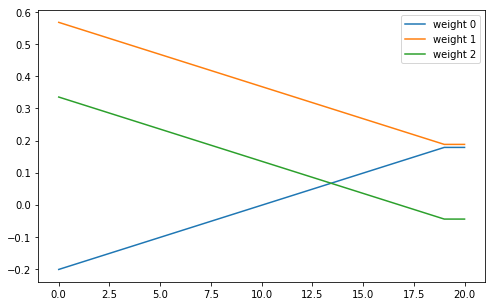

In [7]:
plt.figure(figsize=(8, 5))
lines = plt.plot(weights_history)
plt.legend(lines, [f'weight {i}' for i in range(3)]);

If I use a larger learning rate the weights change faster.

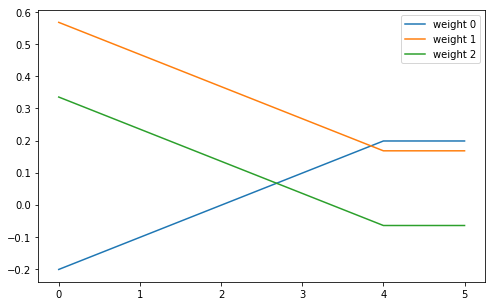

In [8]:
np.random.seed(32)

weights, final_pred, sum_error, weights_history = perceptron(X, y, learning_rate=0.05)

plt.figure(figsize=(8, 5))
lines = plt.plot(weights_history)
plt.legend(lines, [f'weight {i}' for i in range(3)]);

If the learning rate is too large there can be noticeable oscillations in the weights. In this case it still works though.

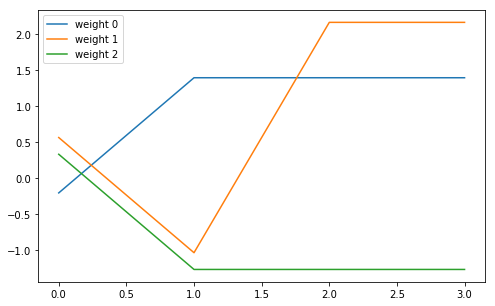

In [9]:
np.random.seed(32)

weights, final_pred, sum_error, weights_history = perceptron(X, y, learning_rate=0.8)

plt.figure(figsize=(8, 5))
lines = plt.plot(weights_history)
plt.legend(lines, [f'weight {i}' for i in range(3)]);

Next I will use the Perceptron on the OR operation. Again, `-1` represents `False` and `1` represents `True`.

In [10]:
X = np.array([[-1, -1, 1],
              [-1,  1, 1],
              [ 1, -1, 1],
              [ 1,  1, 1]])
y = np.array([-1, 1, 1, 1])

np.random.seed(37)

weights, final_pred, sum_error, weights_history = perceptron(X, y)

The Perceptron performed admirably, correctly learning the proper output for each input.

In [11]:
np.vstack([y, final_pred]).T

array([[-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

The total error is zero.

In [12]:
sum_error

0.0

The plot of the weights evolving over time is similar to the AND function.

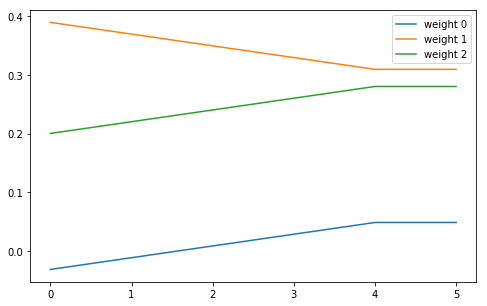

In [13]:
plt.figure(figsize=(8, 5))
lines = plt.plot(weights_history)
plt.legend(lines, [f'weight {i}' for i in range(3)]);

Finally, the XOR function.

In [14]:
X = np.array([[-1, -1, 1],
              [-1,  1, 1],
              [ 1, -1, 1],
              [ 1,  1, 1]])
y = np.array([-1, 1, 1, -1])

np.random.seed(42)

weights, final_pred, sum_error, weights_history = perceptron(X, y)

As expected, this did not work. The Perceptron incorrectly predicts two of the output values.

In [15]:
np.vstack([y, final_pred]).T

array([[-1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [-1.,  1.]])

The predictions have errors.

In [16]:
sum_error

4.0

The Perceptron tries to find an acceptable set of weights but fails to converge on weights that work. Instead, it oscillates around weights of zero until it hits the iteration limit.

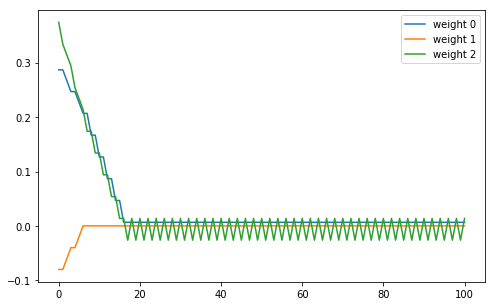

In [17]:
plt.figure(figsize=(8, 5))
lines = plt.plot(weights_history)
plt.legend(lines, [f'weight {i}' for i in range(3)]);

## Sigmoid Activation Function

Let's make this assignment more interesting by changing the activation function from the sign function to the sigmoid function. The sigmoid function is commonly used in Neural Networks to better handle complex data.

The sigmoid function looks like this:

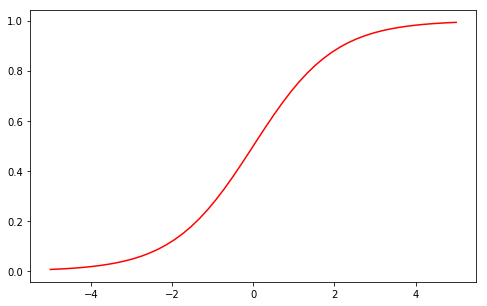

In [18]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-5, 5)

plt.figure(figsize=(8, 5))
plt.plot(x, sigmoid(x), c='r');

Observe that the function output is always between `0` and `1`. As the function input approaches positive or negative infinity it moves closer to `0` or `1`.

For this to work I must represent `False` as `0` instead of `-1`. Below I show the data inputs for the AND function.

In [19]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
y = np.array([0, 0, 0, 1])

For this to work correctly I must also increase the learning rate and the maximum number of iterations.

In [20]:
np.random.seed(22)

weights, final_pred, sum_error, weights_history = perceptron(X, y,
                                                             learning_rate=0.1,
                                                             n=1000,
                                                             activation=sigmoid)

The algorithm is still able to learn the AND function but cannot ever return `0` or `1` because the sigmoid function only returns `0` or `1` at postive or negative infinity.

In [21]:
np.vstack([y, final_pred]).T

array([[  0.00000000e+00,   2.03864476e-04],
       [  0.00000000e+00,   4.96186064e-02],
       [  0.00000000e+00,   4.96199381e-02],
       [  1.00000000e+00,   9.30402233e-01]])

Therefore for this problem the error cannot ever be zero.

In [22]:
sum_error

0.16919953942730676

The plot shows nice smooth curves as the weights evolve to fit the data.

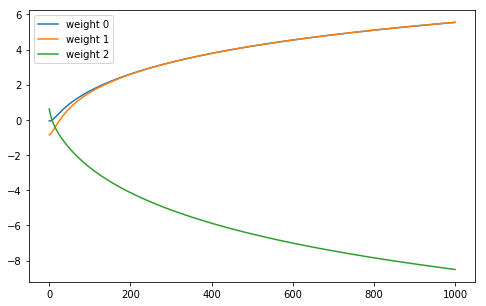

In [23]:
plt.figure(figsize=(8, 5))
lines = plt.plot(weights_history)
plt.legend(lines, [f'weight {i}' for i in range(3)]);